# Titanic Data Evaluation

I will use the Titanic data set to ask whether survival was random, or dependent on any external criteria. In particular I will be focusing on three factors:
<ol>
<li>Was the <b>Passenger Class</b> a factor in the likelihood of survival?</li>
<li>Was <b>Gender</b> a factor in survival?</li>
<li>Was <b>Age</b> a factor in survial?</li>
</ol>

In order to do this I will be using the data from the provided "titanic-data.csv" file which contains information on a sample of 891 of the 2,224 people onboard.

## Procedure

### Step 1: Review the raw data
In order to answer the question, I will first extract the data from the csv file and examine it to determine the information it contains, and the type of data present.

### Step 2: Clean the data
The next step will be to clean the data by removing any irrelevent criteria which may be present, as well as combining data into groups in order to help better understand any patterns.

### Step 3: Perform analysis to answer the question
Once the dataset has been properly formatted, I will begin the analysis to determine whether survival was by chance or was affected by any of the three factors identified in my question.

<b>FIRST:</b>
I will perform a high-level review of the data to determine a baseline of overall survival.

<b>SECOND:</b>
I will then examine the data in regards to whether Class had an impact on survival rate.

<b>THIRD:</b>
I will analyze the data to see if gender was a factor.

<b>FOURTH:</b>
I will look at the effect of age (in terms of age group) on survival rate.


In [157]:
#Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all graphs
sns.set_style("dark")

In [158]:
# Read in the dataset and create a dataframe called "titanic_raw_data"
titanic_raw_data = pd.read_csv('titanic-data.csv')

In [159]:
# Print the first few records to review data format and categories
titanic_raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
# Print the last few records
titanic_raw_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [161]:
# Descriptive statistics on the dataset:
titanic_raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
# Understand data types contained in the set
titanic_raw_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Description of the raw data:

The dataset contains the following information:
<ol>
<li><b>PassengerID:</b> An index for all of the passengers running from 0 to 890, indicating 891 total</li>
<li><b>Survived:</b> A simple indicator for whether the passenger survived ("1") or died ("0")</li>
<li><b>Pclass:</b> An indicator of whether the passenger was booked as 1st Class ("1"), 2nd Class ("2"), or 3rd Class ("3")</li>
<li><b>Name:</b> The passenger's full name</li>
<li><b>Sex:</b> The passenger's gender</li>
<li><b>Age:</b> The passenger's age in years</li>
<li><b>SibSp</b> The number of Siblings/Spouses the passenger had</li>
<li><b>Parch:</b> The number of parents/children the passenger had</li>
<li><b>Ticket:</b> The passenger's ticket number</li>
<li><b>Fare:</b> The actual fare paid by the passenger</li>
<li><b>Cabin:</b> The passenger's assigned cabin number</li>
<li><b>Embarked:</b>The port from which the passenger embarked on the journey</li>
</ol>

After reviewing this list I have determined that the <b>Name</b>, <b>SibSp</b>, <b>Parch</b>, <b>Ticket</b>, <b>Fare</b>, <b>Cabin</b>, and <b>Embarked</b> data are all irrelevent in the context of the question I wish to answer, and will remove them from the dataset:

In [163]:
# Remove unnecessary columns
titanic_trimmed_data = titanic_raw_data.drop(['Name','Ticket','Cabin','Fare','Embarked', 'Parch', 'SibSp'], axis=1)

In [164]:
# Check titanic_trimmed_data type
titanic_trimmed_data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


At this point I will also create a new column called <b>Agegroup</b> to aggregate the passengers into one of three categories according to their age:
<ol>
<li><b>Child:</b> Containing passengers from 0 - 15 years of age</li>
<li><b>Young:</b> Containing passengers from 16 - 25 years of age</li>
<li><b>Mature:</b> Containing passengers 26+ years of age</li>
</ol>

I've chosen to use three broad age categories for convenience, and to facilitate a general analysis of the data.  The cutoff ages were selected based on a combination of broad societal standards, as well as biological maturity.  

In [165]:
# Create new column called Agegroup with Child: 0 - 15, Young: 16 - 25, Mature: 26+

titanic_trimmed_data['Agegroup'] = pd.cut(titanic_trimmed_data['Age'], [0, 15, 25, 100], labels=["Child", "Young", "Mature"])
titanic_data = titanic_trimmed_data

I will check the data types for the new set by looking at the Col headers and data types:

In [166]:
# Confirm column addition by checking the first few rows
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Agegroup
0,1,0,3,male,22.0,Young
1,2,1,1,female,38.0,Mature
2,3,1,3,female,26.0,Mature
3,4,1,1,female,35.0,Mature
4,5,0,3,male,35.0,Mature


In [167]:
# Check data types
titanic_data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Agegroup       category
dtype: object

The new <b>Agegroup</b> column needs to have it's data type changed from "category" to "object":

In [168]:
# Convert 'Agegroup" dtype from category to object
titanic_data['Agegroup'] = titanic_data['Agegroup'].astype(object)
titanic_data_age_cleaned = titanic_data['Agegroup']
print titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Agegroup        object
dtype: object


I also want to have a dataset in which the Surivived categories are strings of "Deceased" and "Survived" instead of 0 and 1.  So I will create a copy of the titanic_data set as titanic_data_s to hold the conversion

In [169]:
# Copy titanic_data
titanic_data_s = titanic_data.copy()

# Convert the Survived categories and confirm
titanic_data_s['Survived'].replace({0:"Deceased", 1:"Survived"}, inplace=True)
titanic_data_s.head()

,PassengerId,Survived,Pclass,Sex,Age,Agegroup
0,1,Deceased,3,male,22.0,Young
1,2,Survived,1,female,38.0,Mature
2,3,Survived,3,female,26.0,Mature
3,4,Survived,1,female,35.0,Mature
4,5,Deceased,3,male,35.0,Mature


In [170]:
titanic_data_s.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Sex             object
Age            float64
Agegroup        object
dtype: object

In [171]:
# Chech to see that titanic_data is unchanged
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Agegroup
0,1,0,3,male,22.0,Young
1,2,1,1,female,38.0,Mature
2,3,1,3,female,26.0,Mature
3,4,1,1,female,35.0,Mature
4,5,0,3,male,35.0,Mature


In [172]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Agegroup        object
dtype: object

In [173]:
# Run descriptive statistics on the entire dataset to see if manipulation had any effect on the data 
titanic_data_s.describe()

,PassengerId,Pclass,Age
count,891.000000,891.000000,714.000000
mean,446.000000,2.308642,29.699118
std,257.353842,0.836071,14.526497
min,1.000000,1.000000,0.420000
25%,223.500000,2.000000,20.125000
50%,446.000000,3.000000,28.000000
75%,668.500000,3.000000,38.000000
max,891.000000,3.000000,80.000000


Looking at the data, we see that there are 177 passengers for whom Age is missing.  This will be important when we evaluate whether the passenger's age had any impact on their likelihood of survival, but for now we will just take note of this.

Finally, I will create a function <b>chi_sq</b> to test the impact of the three criteria we highlighted

In [210]:
def chi_sq(data_set, criteria):
    titanic_chi = data_set.copy()

#Overall survival rate by Data Set
    titanic_survived = titanic_chi['Survived'].mean()

#Observed and expected rates
    observed = titanic_chi.groupby(criteria).sum()['Survived']
    total = titanic_chi.groupby(criteria).count()['Survived']
    expected = titanic_chi.groupby(criteria).count()['Survived']*titanic_survived
    proportion=observed/total

#data frame
    allData=pd.concat([observed, expected, total, proportion], axis=1)
    allData.columns=["Observed", "Expected", "Total", "Observed Rate"]
    allData['Expected Rate'] = titanic_survived

#test
    print scipy.stats.chisquare(observed, expected)
    return allData
   

# General Survival Review
At this point I want to get an idea of the data set. First, let's check a breakdown of passengers according to age:

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


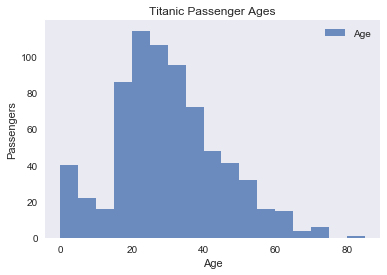

In [175]:
# A look at the age breakdown for all passengers
age_hist=titanic_data['Age'].plot.hist(bins=range(0, 86, 5), legend=True, alpha=0.8)
age_hist.set_ylabel('Passengers')
age_hist.set_xlabel('Age')
age_hist.set_title('Titanic Passenger Ages')
pd.DataFrame(titanic_data['Age'].describe())

As this shows, most of the passengers on the Titanic were between 20 and 40 years of age. Next, let's see the overall survival rate for all passengers

In [176]:
# Determine the ratio of total survivors and fatalities
overall_titanic_survival = titanic_data_s.groupby('Survived')
pid_df = overall_titanic_survival.agg({'PassengerId' : 'size'})
pid_df / len(titanic_data)

,PassengerId
Survived,
Deceased,0.616162
Survived,0.383838


From this, we see that only about 38.4% of the passengers survived

Age
Survived                  
Deceased count  424.000000
         mean    30.626179
         std     14.172110
         min      1.000000
         25%     21.000000
         50%     28.000000
         75%     39.000000
         max     74.000000
Survived count  290.000000
         mean    28.343690
         std     14.950952
         min      0.420000
         25%     19.000000
         50%     28.000000
         75%     36.000000
         max     80.000000

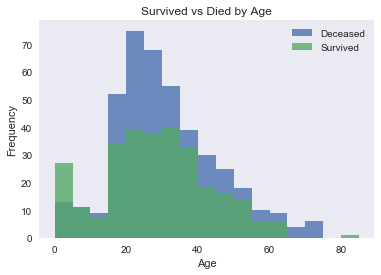

In [177]:
# Comparison of survival according to passenger age to compare with overal ages

age_comp = titanic_data_s.groupby('Survived')['Age'].plot.hist(bins=range(0, 86, 5), legend=True, alpha=0.8)
plt.xlabel('Age')
plt.title('Survived vs Died by Age')
pd.DataFrame(overall_titanic_survival['Age'].describe())

Projecting the survial-by-age histogram on top of the overall age histogram shows a similar breakdown, with most survivors being between 20 and 40 years of age.  However, passengers younger than 20 seem to have suffered very few fatalities.  This is interesting and leads us to suspect that younger passengers survied at a higher rate, and will be examined further later on.

Now we can begin our detailed look at the impact of our three identified crieteria, <b>Class</b>, <b>Gender</b>, and <b>Age</b>.

# Q1: Was Passenger Class a factor in survival?
As both the graph and the table above indicated, there is some evidence that Passenger Class may have played a part in survival rate, with 1st and 2nd class passenger survival being disproportionately higher than 3rd class passengers.

We will begin by generating a table that breaks down survival by passenger class:

In [178]:
survival_class_group = titanic_data_s.groupby(['Survived', 'Pclass'])
survival_class_group.describe()

Age  PassengerId
Survived Pclass                               
Deceased 1      count   64.000000    80.000000
                mean    43.695312   410.300000
                std     15.284243   252.655587
                min      2.000000     7.000000
                25%     31.000000   174.000000
                50%     45.250000   437.000000
                75%     55.250000   608.750000
                max     71.000000   873.000000
         2      count   90.000000    97.000000
                mean    33.544444   452.123711
                std     12.151581   257.771065
                min     16.000000    21.000000
                25%     25.000000   229.000000
                50%     30.500000   414.000000
                75%     39.000000   686.000000
                max     70.000000   887.000000
         3      count  270.000000   372.000000
                mean    26.555556   453.580645
                std     12.334882   263.090509
                min      1.000000     1.000000
                25%     19.000000   206.750000
                50%     25.000000   470.000000
                75%     33.000000   679.500000
                max     74.000000   891.000000
Survived 1      count  122.000000   136.000000
                mean    35.368197   491.772059
                std     13.760017   239.006988
                min      0.920000     2.000000
                25%     24.250000   307.750000
                50%     35.000000   510.500000
                75%     45.000000   693.500000
                max     80.000000   890.000000
         2      count   83.000000    87.000000
                mean    25.901566   439.080460
                std     14.837787   244.211937
                min      0.670000    10.000000
                25%     17.500000   254.000000
                50%     28.000000   441.000000
                75%     34.000000   612.500000
                max     62.000000   881.000000
         3      count   85.000000   119.000000
                mean    20.646118   394.058824
                std     11.995047   264.680245
                min      0.420000     3.000000
                25%     14.000000   169.500000
                50%     22.000000   359.000000
                75%     29.000000   633.500000
                max     63.000000   876.000000

The table above contains a considerable amount of information. We'll condense this by first summarizing the total number of survivors by Passenger Class.

,Survived
Pclass,
1,216
2,184
3,491


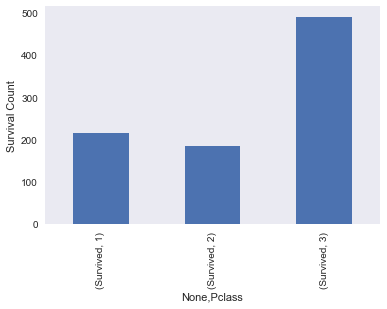

In [179]:
# Titanic P Class survial
titanic_class_survival_count = titanic_data.groupby(['Pclass'])[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Survival Count')
titanic_class_survival_count = titanic_data.groupby(['Pclass'])[['Survived']].count()
titanic_class_survival_count

Next we'll summarize Survival Rate by Class:

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


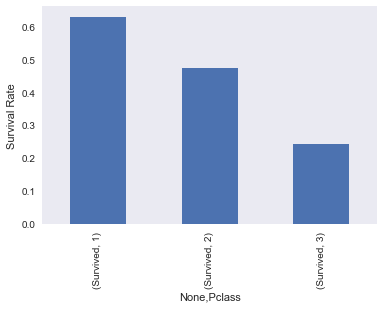

In [180]:
titanic_class_survival = titanic_data.groupby(['Pclass'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival Rate')
titanic_class_survival = titanic_data.groupby(['Pclass'])[['Survived']].mean()
titanic_class_survival

From these we can see that although more 3rd class passengers survived than 1st and 2nd class passengers combined (491 compared to 216 and 184, respectively) the survival rate strongly indicates that Passenger Class was a major contributing factor in the likelihood of survival, as most passengers classified as 1st or 2nd Class managed to survive (63% abd 47%, respectively), while only about 1/4 of 3rd Class passengers did.

In order to determine whether class had an affect on passenger survival, we will run the chi-square test to check whether our observed results are statistically different from the expected results. Given that we have previously determined the overall surivivor rate, we can use this test to calculate the expected and compare it to the observed.

For this test:
<blockquote><b>H<sub>0</sub>:</b> There is no difference between the observed and expected survival for each class<br/>
<b>H<sub>1</sub>: </b> The observed survival is statistically different from the expected survival for class</blockquote>
Once again, we will employ <b>&#945;</b> = 0.05

In [211]:
# Run the chi_sq function
chi_sq(titanic_data, ('Pclass'))

Power_divergenceResult(statistic=63.396245597723173, pvalue=1.7126955990497913e-14)


,Observed,Expected,Total,Observed Rate,Expected Rate
Pclass,,,,,
1,136,82.909091,216,0.629630,0.383838
2,87,70.626263,184,0.472826,0.383838
3,119,188.464646,491,0.242363,0.383838


The results of the chi square test for Class shows a p = 1.71<sup>-14</sup>, which is well below the significance level of 0.05, meaning we can reject the null.  This test also confirms the t-test results, and allows us to conclude that Class indeed was a factor in survival rate

# Q2: Was Gender a factor in survival?
While the initial evaluation of all survivors indicated that Passenger Class was a factor in survival, later confirmed through deeper testing, there was little information regarding whether women survived at a higher rate than men.

In order to consider whether gender had an effect, we will compare the total number of male vs female survivors:

,Survived
Sex,
female,314
male,577


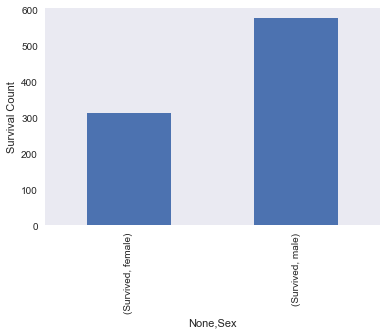

In [182]:
# Titanic Gender Survival Count
titanic_gender_survival_count = titanic_data.groupby(['Sex'])[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Survival Count')
titanic_gender_survival_count = titanic_data.groupby(['Sex'])[['Survived']].count()
titanic_gender_survival_count

And next do the same to compare male vs female survival rate:

,Survived
Sex,
female,0.742038
male,0.188908


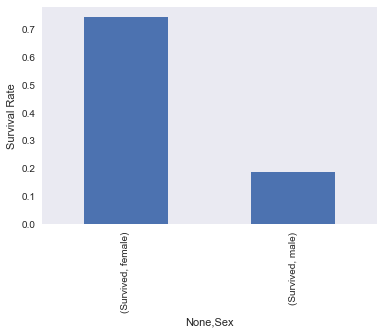

In [183]:
# Titanic Gender Survival Rate
titanic_gender_survival = titanic_data.groupby(['Sex'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival Rate')
titanic_gender_survival = titanic_data.groupby(['Sex'])[['Survived']].mean()
titanic_gender_survival

Much like the case for Passenger Class, we see here that the total number of male survivors is nearly double female, yet the survival rates are drastically different, with females surviving at nearly 4 times the rate of men.

The numbers lead us to believe that gender was indeed a factor in survival.  This is well illustrated in the pie-graphs below.



### Male Survival

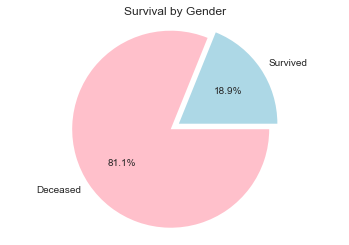

In [184]:
# Gender Survival Pie Chart

labels = 'Survived', 'Deceased'
sizes = [titanic_data.groupby('Sex')['Survived'].mean()['male'], 1.0 - titanic_data.groupby('Sex')['Survived'].mean()['male']]
colors = ['lightblue', 'Pink']
explode = (0.1, 0) # only "explode" survivors

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Survival by Gender')

### Female Survival

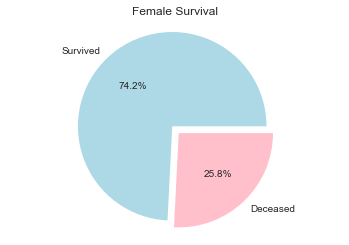

In [185]:
#Female Survival Pie Chart
labels = 'Survived', 'Deceased'
sizes = [titanic_data.groupby('Sex')['Survived'].mean()['female'], 1.0 - titanic_data.groupby('Sex')['Survived'].mean()['female']]
colors = ['lightblue', 'pink']
explode = (0.1, 0) # only "explode" survivors

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Female Survival')

These charts fully illustrate the degree to which females were more likely to survive than men, with approximately 75% of the females surviving compared to less than 20% of men surviving.

In order to confirm the impact of gender we again run the chi-square test to check whether our observed results are statistically different from the expected results.

For this test:
<blockquote><b>H<sub>0</sub>:</b> There is no difference between the observed and expected survival based on gender<br/>
<b>H<sub>1</sub>: </b> Survival by gender is not equal</blockquote>
Once again, we will employ <b>&#945;</b> = 0.05

In [213]:
# Run the ch_sq function
chi_sq(titanic_data, ('Sex'))

Power_divergenceResult(statistic=162.08166685161615, pvalue=3.970516389658672e-37)


,Observed,Expected,Total,Observed Rate,Expected Rate
Sex,,,,,
female,233,120.525253,314,0.742038,0.383838
male,109,221.474747,577,0.188908,0.383838


The results of the chi square test for Gender shows a p = 3.97<sup>-37</sup>, which is well below the significance level of 0.05, meaning we can confidently reject the null.  This test also confirms the t-test results, and allows us to conclude that Gender was a major factor in survival rate

# Q3: Was age a factor in survival?

So far we have seen that both passenger class and gender had an impact on the likelihood of surviving.  Our last question will focus on the second part of the famous "Women and Children first!" nautical saying by examining whether passenger age was a factor in survival rate.


Again, we start by first summarizing the survival data according to age.

Remember that we had previously created an Age Group category for us to aggregate the passengers into three categories: 
<ol>
<li><b>Child:</b> 0 - 15 years old</li>
<li><b>Young:</b> 16 - 25 years old</li>
<li><b>Mature:</b> 25+ years old</li>
</ol>

In [187]:
# Clean Age data to remove blank ages
titanic_data_age_cleaned = titanic_trimmed_data.dropna()

# Confirm removal of NaN
titanic_data_age_cleaned.describe()

,PassengerId,Survived,Pclass,Age
count,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118
std,259.119524,0.491460,0.838250,14.526497
min,1.000000,0.000000,1.000000,0.420000
25%,222.250000,0.000000,1.000000,20.125000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.750000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


The new count total of 714 confirms that we no longer have passengers without any age data. 

At this point we have removed all of the passengers without any age data, and confirmed that there has been no change in the resuts, so we can proceed.

Now we'll look at both counts and rate for Age Group

,Survived
Agegroup,
Child,83
Mature,413
Young,218


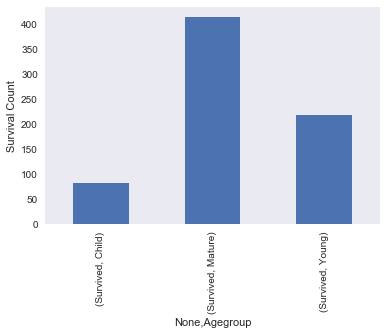

In [188]:
# Titanic Age Group survival total count
titanic_age_survival_count = titanic_data_age_cleaned.groupby(['Agegroup'])[['Survived']].count().unstack().plot(kind='bar').set_ylabel('Survival Count')
titanic_age_survival_count = titanic_data_age_cleaned.groupby(['Agegroup'])[['Survived']].count()
titanic_age_survival_count

,Survived
Agegroup,
Child,0.590361
Mature,0.401937
Young,0.344037


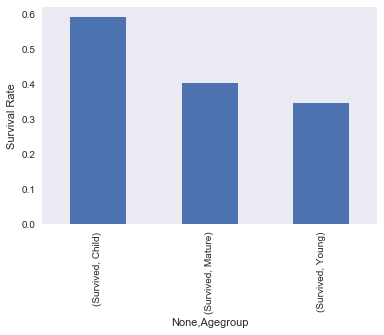

In [189]:
# Titanic Age Group survival Rate
titanic_age_survival = titanic_data_age_cleaned.groupby(['Agegroup'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival Rate')
titanic_age_survival = titanic_data_age_cleaned.groupby(['Agegroup'])[['Survived']].mean()
titanic_age_survival

We can see that the total number of Child (0 - 15 years) passengers that survived was much lower than either Young (16 - 25) or Mature (26+). This is not surprising, as our passenger breakdown above showed, most passengers in our data set were 20+ years old, so we would expect more of them to survive.

However, we also see that roughly 59% of passengers aged 0 - 15 years (Child group) survived, 34.4% of passengers aged 16 - 25 (Young group) survived, and 40% of passengers aged 26+ (Mature group)survived. This is compared to the overall survival rate of 38.4% (obtained from the review of overall data).

Even though this information does appear to support the hypothesis that age impacted survival rate, we will begin to confirm this by running the chi-square test.

For this test:
<blockquote><b>H<sub>0</sub>:</b> There is no difference between the observed and expected survival for each age group<br/>
<b>H<sub>1</sub>: </b> The observed survival is statistically different from the expected survival for age group</blockquote>
Once again, we will employ <b>&#945;</b> = 0.05

In [214]:
# Run the chi_sq function
chi_sq(titanic_data, ('Agegroup'))

Power_divergenceResult(statistic=10.475060392231841, pvalue=0.0053133636097081847)


,Observed,Expected,Total,Observed Rate,Expected Rate
Agegroup,,,,,
Child,49,31.858586,83,0.590361,0.383838
Mature,166,158.525253,413,0.401937,0.383838
Young,75,83.676768,218,0.344037,0.383838


The chi-square results (p = 0.005) show that indeed the Child group (0 - 15y) did survive at a rate statistically greater than expected.  However, these results also show that both Young and Mature were very close to the expected rate of survival, and that the greater overall number of Young and Mature survivors was due to the greater number of passengers in those groups.

# Other Observations
At this point it may be of interest to check survival rates when we combine multiple criteria to see whether one has a greater influence over another, or if there are any potential correlative relationships.

To do so, we will evaluate Class and Gender, Age Group and Gender, and Class and Age Group.

# Survival according to Class and Gender

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

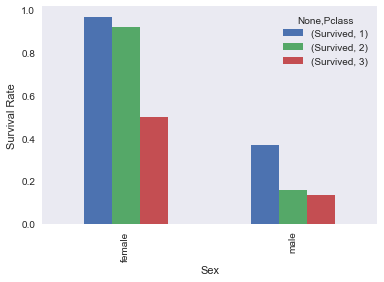

In [191]:
# Break down total survival by Class and Gender
titanic_c_g_survival=titanic_data.groupby(['Sex', 'Pclass'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival Rate')
titanic_c_g_survival=titanic_data.groupby(['Sex', 'Pclass'])[['Survived']].mean()
titanic_c_g_survival

We can see that females, regardless of passenger class, were much more likely to suvive than males, although the rate of survival between 1st Class male passengers is close to that of 3rd Class female passengers.

## Survival according to Age Group and Gender

Survived
Agegroup Sex             
Child    female  0.651163
         male    0.525000
Mature   female  0.791367
         male    0.204380
Young    female  0.746835
         male    0.115108

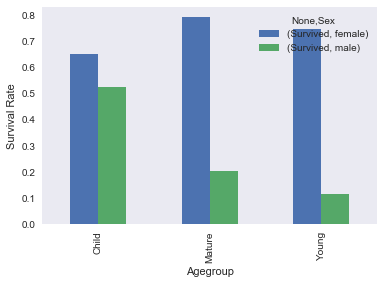

In [192]:
# Break down total survival by Age Group and Gender
titanic_a_g_survival=titanic_data.groupby(['Agegroup', 'Sex'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival Rate')
titanic_a_g_survival=titanic_data.groupby(['Agegroup', 'Sex'])[['Survived']].mean()
titanic_a_g_survival

In this case we again see that females have a higher likelihood of surviving than males, although the difference in the Child Age Group is small (65% survival rate for females, and 52.5% for males).

## Survival by Age Group and Class

Survived
Pclass Agegroup          
1      Child     0.833333
       Mature    0.618056
       Young     0.777778
2      Child     1.000000
       Mature    0.416667
       Young     0.413043
3      Child     0.431034
       Mature    0.198758
       Young     0.205882

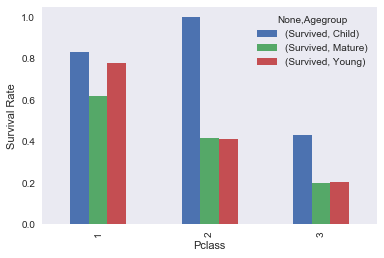

In [193]:
# Break down total survival by Class and Age Group
titanic_ca_survival=titanic_data.groupby(['Pclass','Agegroup'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Survival Rate')
titanic_ca_survival=titanic_data.groupby(['Pclass','Agegroup'])[['Survived']].mean()
titanic_ca_survival

Based on this, we may can see that while the Child Age Group had the highest rate of survival across passenger classes, all three age groups in 3rd Class fared worse than their counterparts in either 1st or 2nd Class. Further, that even 3rd Class Child passengers were no more likely to survive than any age group in the other two classes.

# Conclusion

<b>Review of Results</b><br/>
The purpose of this evaluation was to determine whether every passenger on the Titanic had an equal chance of survival, or whether passenger class and the old nautical expression “women and children first” had an impact on survival rate.
The data was evaluated for each of these questions using the chi-square test, and the results show that Class, Gender, and Age Group all had an impact, although there was a distinct hierarchy:
<ol>
<li>Gender had the biggest impact on whether or not a passenger survived.  3 out of 4 women in the dataset survived, while fewer than 1 out of 5 men did. Further, when combined with either Class or Age Group females continued to have a higher rate of survival than males.</li>
<li>The next most important factor on survival was Passenger Class, with first class passengers slightly more likely to have survived than second class passengers, but both were much more likely to survive than third class. This was aslo seen when combined with age, where all first and second class passenger age groups fared at least as well as the 3rd class child group.</li> 
<li>Somewhat surprisingly, Age Group was the least important factor on survival. Although the Child age group had the highest rate of survial when combined with Class, we see that this did not hold true when Gender was included - as females in both the Young and Mature Age Groups survived at a higher rate than either male or female children.</li>
</ol>

<b>Limitations</b><br/>
Although our evaluation confirmed that Gender, Class, and Age were all important in whether a passenger survived, there are still other questions remaining.  Our analysis primarily focused on these three criteria as discrete factors, with only a superficial examination of survival when combining two together. A more detailed examination might prove interesting.

Further, it should again be noted that this analysis was based on a sample of 891 passengers, where the Titanic had a total of 2,224 (passengers and crew).  While we do not have any reason to believe the sample was not a legitimate representation of the population, we also cannot confirm this.

Lastly, this dataset had nearly 20% of the entries (177 out of 891) without age data.  Correcting for this by removing the missing entries in order to do our Age Group analysis could conceivably had an impact on the results by skewing the data one way or another, and so the results for our Age Group analysis may not be accurate. 

<b>Summary</b><br/>
Our data shows that on the Titanic, the chivalrous attitude of “women and children first” first is partially correct, as Women had the highest rate of survival regardless of Class or Age Group. Children were favored, but not as much as females. Given the results, it seems the saying ought to be "Women, First Class Passengers, and Children, first!"
